# Single Journal

# Loading Data

In [2]:
# # Q1
# comp <- read.csv("D:/Research/keyword/Keyword/Q1/computers_and_education_calculated_vertical_na_scale.csv",
#                 stringsAsFactors=FALSE)
# comp[1,"source.title"]
# nrow(comp)
# max(comp$numkeys)
# summary(comp$year)
# comp$quarter <- "q1"

# internet <- read.csv("D:/Research/keyword/Keyword/Q1/internet and higher education_calculated_vertical_na_scale.csv",
#                 stringsAsFactors=FALSE)
# internet[1,"source.title"]
# nrow(internet)
# max(internet$numkeys)
# summary(internet$year)
# internet$quarter <- "q1"

# teaching <- read.csv("D:/Research/keyword/Keyword/Q1/teaching and teacher education_calculated_vertical_na_scale.csv",
#                    stringsAsFactors=FALSE)
# teaching[1,"source.title"]
# nrow(teaching)
# max(teaching$numkeys)
# summary(teaching$year)
# teaching$quarter <- "q1"


# print("----------------------------------------------------------")
# #Q2
# rev <- read.csv("D:/Research/keyword/Keyword/Q2/review_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# rev[1,"source.title"]
# nrow(rev)
# max(rev$numkeys)
# summary(rev$year)
# rev$quarter <- "q2"

# teacher <- read.csv("D:/Research/keyword/Keyword/Q2/teacher development_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# teacher[1,"source.title"]
# nrow(teacher)
# max(teacher$numkeys)
# summary(teacher$year)
# teacher$quarter <- "q2"

# techinhigh <- read.csv("D:/Research/keyword/Keyword/Q2/teaching in higher education_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# techinhigh[1,"source.title"]
# nrow(techinhigh)
# max(techinhigh$numkeys)
# summary(techinhigh$year)
# techinhigh$quarter <- "q2"

# print("----------------------------------------------------------")

# #Q3
# pers<- read.csv("D:/Research/keyword/Keyword/Q3/perspective_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# pers[1,"source.title"]
# nrow(pers)
# max(pers$numkeys)
# summary(pers$year)
# pers$quarter <- "q3"

# history<- read.csv("D:/Research/keyword/Keyword/Q3/history of education_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# history[1,"source.title"]
# nrow(history)
# max(history$numkeys)
# summary(history$year)
# history$quarter <- "q3"

# continue<- read.csv("D:/Research/keyword/Keyword/Q3/journal of continuing higher education_calculated_vertical_na_scale.csv"
#                 ,stringsAsFactors=FALSE)
# continue[1,"source.title"]
# nrow(continue)
# max(continue$numkeys)
# summary(continue$year)
# continue$quarter <- "q3"
# print("----------------------------------------------------------")

# #Q4
# compin <- read.csv("D:/Research/keyword/Keyword/Q4/Computers in Education_calculated_vertical_na_scale.csv"
#                    ,stringsAsFactors=FALSE)
# compin[1,"source.title"]
# nrow(compin)
# max(compin$numkeys)
# summary(compin$year)
# compin$quarter <- "q4"

# evaluation <- read.csv("D:/Research/keyword/Keyword/Q4/evaluation and research in education_calculated_vertical_na_scale.csv"
#                    ,stringsAsFactors=FALSE)
# evaluation[1,"source.title"]
# nrow(evaluation)
# max(evaluation$numkeys)
# summary(evaluation$year)
# evaluation$quarter <- "q4"

pedagogies <- read.csv("D:/Research/keyword/Keyword/Q4/international journal of pedagogies and learning_calculated_vertical_na_scale.csv"
                   ,stringsAsFactors=FALSE)
pedagogies[1,"source.title"]
nrow(pedagogies)
max(pedagogies$numkeys)
summary(pedagogies$year)
pedagogies$quarter <- "q4"

data<- pedagogies


[1] "international journal of pedagogies and learning"

[1] 64

[1] 11

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2012    2012    2013    2013    2014    2014 

In [13]:
# data[data$abstract_length<30,]

# Preparing Data

In [1]:
# ## Finding the difference in columns
# diff <- setdiff(names(comp),names(compin))
# print(diff)
 
# ## creating columns
# for (col_name in diff)
    
#     {
#     if (!(col_name %in% names(rev)))
#     {rev[,col_name] <- NA}
    
#     if (!(col_name %in% names(compin)))
#    { compin[,col_name] <- NA}
#     }

# ## reordering  columns according to comp columns
# rev    <- rev[,names(comp)]
# compin <- compin[,names(comp)]


# ## Combining the datasets
# data <- as.data.frame(rbind(comp,rev,pers,compin),na.strings=c(""))


# ## Checking the number of rows
# nrow(comp)
# nrow(rev)
# nrow(pers)
# nrow(compin)
# ##--------------
# nrow(data)
# nrow(comp) + nrow(rev) + nrow(pers) + nrow(compin) == nrow(data)

# ## Selecting research articles
# # data <- data[data$document.type=="article",]

# #write.csv(data,"D:/Research/keyword/Keyword/All/comp-rev-pers-compin.csv")


# Journals Names

In [3]:
unique(data$source.title)
which(data$source.title=="title")

[1] "international journal of pedagogies and learning"

integer(0)

# Creating Predictors and Target

In [4]:
predictors <- c("no_authors","article_age","page.count","no_references",
                "abstract_length","title_length",
                "abstract_ratio","numkeys", "source.title","weight_ratio"
                
               )

target <- c("cited.by","cited.by_scaled")

data <- data[,c(predictors,target)]

## Remving empty rows
data <- na.omit(data)

# Preparing variables

In [5]:
data[,"no_authors"]      <- as.numeric(data[,"no_authors"  ])
data[,"article_age"]     <- as.numeric(data[,"article_age"  ])
data[,"page.count"]      <- as.numeric(data[,"page.count"  ])
data[,"no_references"]   <- as.numeric(data[,"no_references"  ])
data[,"abstract_length"] <- as.numeric(data[,"abstract_length"  ])
data[,"title_length"]    <- as.numeric(data[,"title_length"  ])
data[,"numkeys"  ]       <- as.numeric(data[,"numkeys"  ])
data[,"cited.by"]        <- as.numeric(data[,"cited.by"] )
data[,"abstract_ratio"]  <- as.numeric(data[,"abstract_ratio"])

data[,"source.title"]    <- as.factor(data[,"source.title"] )
data[,"cited.by"]        <- as.numeric(data[,"cited.by_scaled"] )
str(data)

'data.frame':	64 obs. of  12 variables:
 $ no_authors     : num  3 3 3 2 1 1 2 1 2 1 ...
 $ article_age    : num  2 2 2 2 2 2 2 2 2 2 ...
 $ page.count     : num  16 9 11 11 10 10 8 10 12 9 ...
 $ no_references  : num  42 39 41 36 39 22 19 16 62 34 ...
 $ abstract_length: num  246 153 132 165 160 158 134 111 193 195 ...
 $ title_length   : num  15 7 8 9 16 14 15 14 18 16 ...
 $ abstract_ratio : num  0.00407 0.03922 0 0.01212 0.01875 ...
 $ numkeys        : num  5 5 5 4 4 7 5 11 5 7 ...
 $ source.title   : Factor w/ 1 level "international journal of pedagogies and learning": 1 1 1 1 1 1 1 1 1 1 ...
 $ weight_ratio   : num  0.0312 0.0312 0.0156 0.0156 0.0156 ...
 $ cited.by       : num  -0.586 -0.586 -0.586 -0.586 -0.586 ...
 $ cited.by_scaled: num  -0.586 -0.586 -0.586 -0.586 -0.586 ...


# Exploring Variables

In [6]:
## Variables Summary Statistics 

rbind(summary(data[,1:12]))
sd(data$cited.by)

,no_authors,article_age,page.count,no_references,abstract_length,title_length,abstract_ratio,numkeys,source.title,weight_ratio,cited.by,cited.by_scaled
,Min. : 1.000,Min. :2.000,Min. : 4.00,Min. : 7.00,Min. : 76.0,Min. : 6.00,Min. :0.00000,Min. : 2.000,international journal of pedagogies and learning:64,Min. :0.01562,Min. :-0.5855,Min. :-0.5855
,1st Qu.: 1.000,1st Qu.:2.000,1st Qu.: 9.00,1st Qu.:27.00,1st Qu.:148.2,1st Qu.:10.00,1st Qu.:0.01705,1st Qu.: 4.000,NA,1st Qu.:0.01562,1st Qu.:-0.5855,1st Qu.:-0.5855
,Median : 1.000,Median :3.000,Median :11.00,Median :35.50,Median :172.5,Median :13.00,Median :0.03356,Median : 5.000,NA,Median :0.01562,Median :-0.5855,Median :-0.5855
,Mean : 1.875,Mean :3.141,Mean :11.17,Mean :37.16,Mean :180.6,Mean :12.64,Mean :0.03907,Mean : 5.062,NA,Mean :0.01929,Mean : 0.0000,Mean : 0.0000
,3rd Qu.: 2.000,3rd Qu.:4.000,3rd Qu.:13.00,3rd Qu.:45.25,3rd Qu.:203.0,3rd Qu.:15.00,3rd Qu.:0.05242,3rd Qu.: 6.000,NA,3rd Qu.:0.01562,3rd Qu.: 0.2291,3rd Qu.: 0.2291
,Max. :12.000,Max. :4.000,Max. :23.00,Max. :72.00,Max. :344.0,Max. :26.00,Max. :0.15455,Max. :11.000,NA,Max. :0.06250,Max. : 5.9314,Max. : 5.9314


[1] 1

In [26]:
# which(data$no_references==118)
# data[250,"references"]

# sort(unique(data$no_references))
# # require(stringr,quietly=TRUE)
# # str_count(data[209,"references"], ";")

In [12]:
# data[which(data$page.count<5),]
# which(data$abstract_length > 262)
# data[which(data$abstract_length > 262),]

,no_authors,article_age,page.count,no_references,abstract_length,title_length,abstract_ratio,numkeys,source.title,weight_ratio,cited.by
148,3,5,2,22,228,11,0.03508772,8,perspectives in education,0.003636364,0
252,1,8,4,13,122,13,0.008196721,3,perspectives in education,0.003636364,1
265,1,9,4,5,37,8,0,2,perspectives in education,0.003636364,0


# Exploring the target variable

In [32]:
cited.by.table <- table(data$cited.by)
# cited.by.table
# round(prop.table(cited.by.table),2) # row percentages 
rbind(cited.by.table,round(prop.table(cited.by.table),2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,50,51,52,53,54,56,57,58,59,62,63,64,68,69,70,75,78,84,88,91,93,96,100,102,111,114,116,124,130,135,137,148,163,195,206,220,235,236,330,398,746
cited.by.table,20,16,20,20,13,12,12,16,7,11,8,6,8,7,11,8,6,6,11,4,7,5,9,5,7,6,6,2,6,7,1,2,4,1,3,4,4,3,5,1,1,2,4,1,1,2,2,2,1,1,5,2,1,2,3,2,1,1,1,1,2,1,1,2,1,3,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
,0.05,0.04,0.05,0.05,0.03,0.03,0.03,0.04,0.02,0.03,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.03,0.01,0.02,0.01,0.02,0.01,0.02,0.02,0.02,0.01,0.02,0.02,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


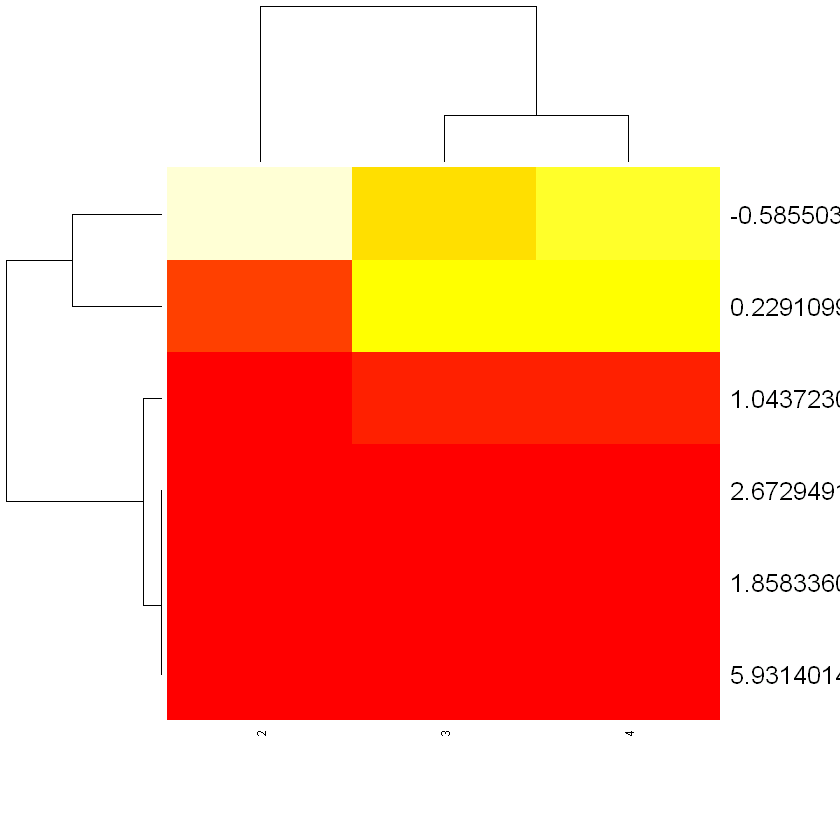

In [8]:
cited.by.age <- table(data$cited.by,data$article_age)
#cited.by.age

windows.options(width=10000, height=20000)
heatmap(as.matrix(cited.by.age), Colv=F, scale='none',cexCol = 0.75, margins = c(6,6) )

# Exploring abstract ratio

In [44]:
print("Number of Zeros")
length(which(data$abstract_ratio==0))

print("Number of Non-Zeros")
length(which(data$abstract_ratio>0))

print("Total")
nrow(data)

[1] "Number of Zeros"


[1] 23

[1] "Number of Non-Zeros"


[1] 16

[1] "Total"


[1] 39

# Variables Distribution

ERROR: Error in hist.default(data[, colname], main = colname, xlab = "", col = "green"): 'x' must be numeric


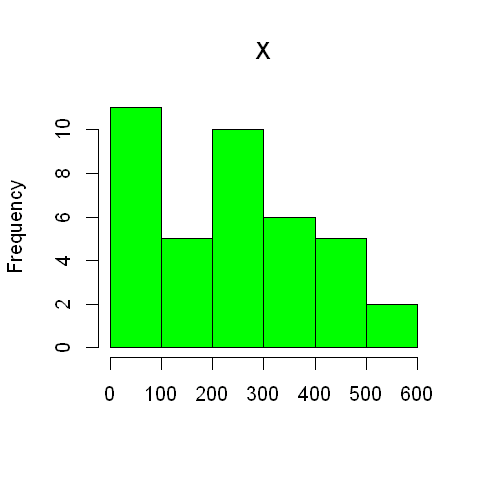

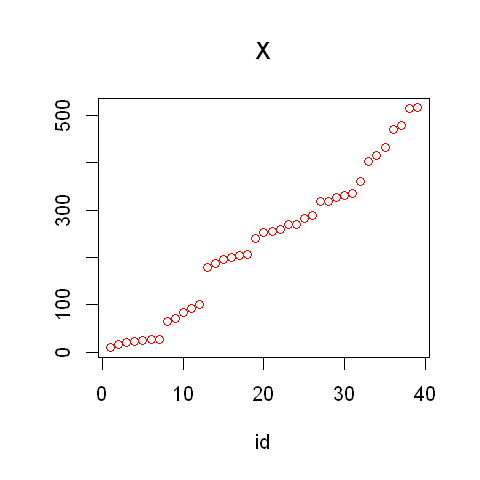

In [43]:
library(repr)
## options(repr.plot.width=3, repr.plot.height=3,repr.plot.res = 40)
options(repr.plot.width=4, repr.plot.height=4)


for (colname in names(data))
{hist(data[,colname],main=colname,xlab="",col="green");
plot(data[,colname],main=colname,xlab="id",ylab="",col="red")
}



# Correlation Matrix (including the target  variable)

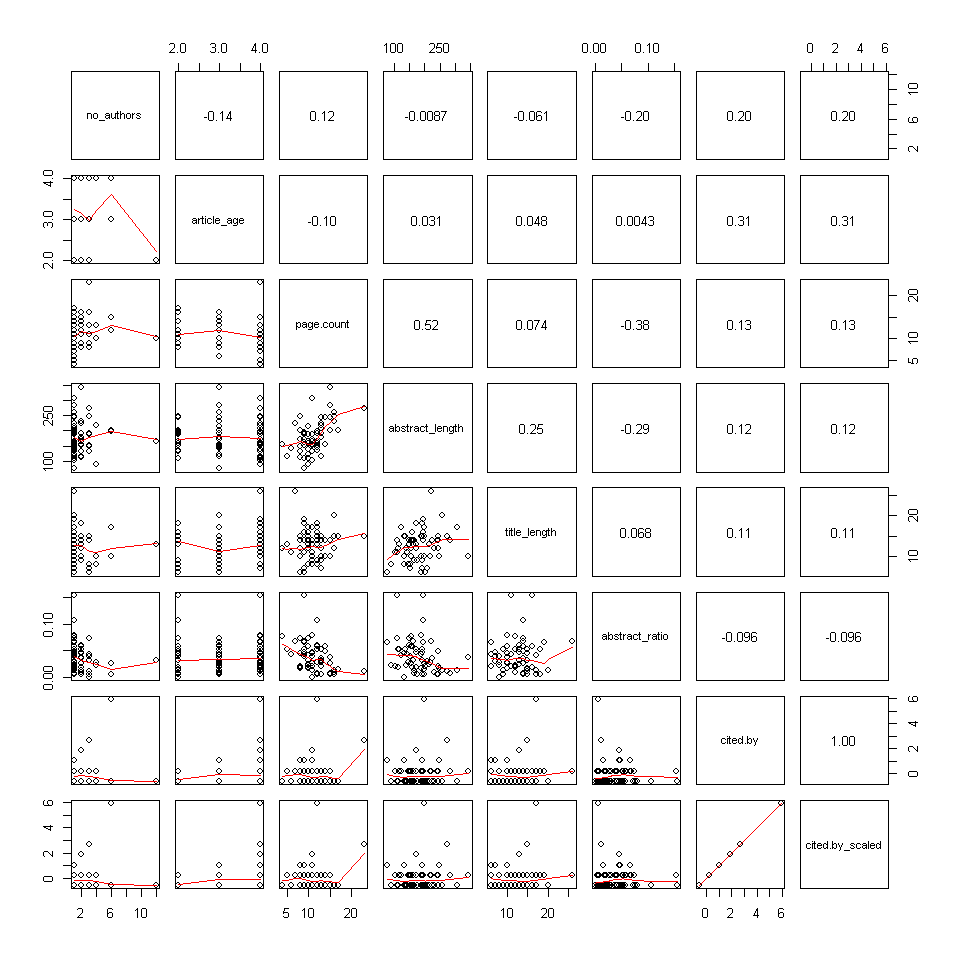

In [9]:
## correcting predictors
predictors <- c("no_authors","article_age","page.count",
                "abstract_length","title_length",
                "abstract_ratio"
               )

library(repr)
## options(repr.plot.width=3, repr.plot.height=3,repr.plot.res = 40)
options(repr.plot.width=8, repr.plot.height=8)

## put correlations on the upper panels,
## with size proportional to the correlations.
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    # r <- abs(cor(x, y))

    r <- cor(x, y)
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    
    # removing the propotional property    
    # text(0.5, 0.5, txt, cex = cex.cor * r)
    text(0.5, 0.5, txt)
   
}
    
pairs(data[,c(predictors,target)],lower.panel = panel.smooth, upper.panel = panel.cor)

# Heatmap

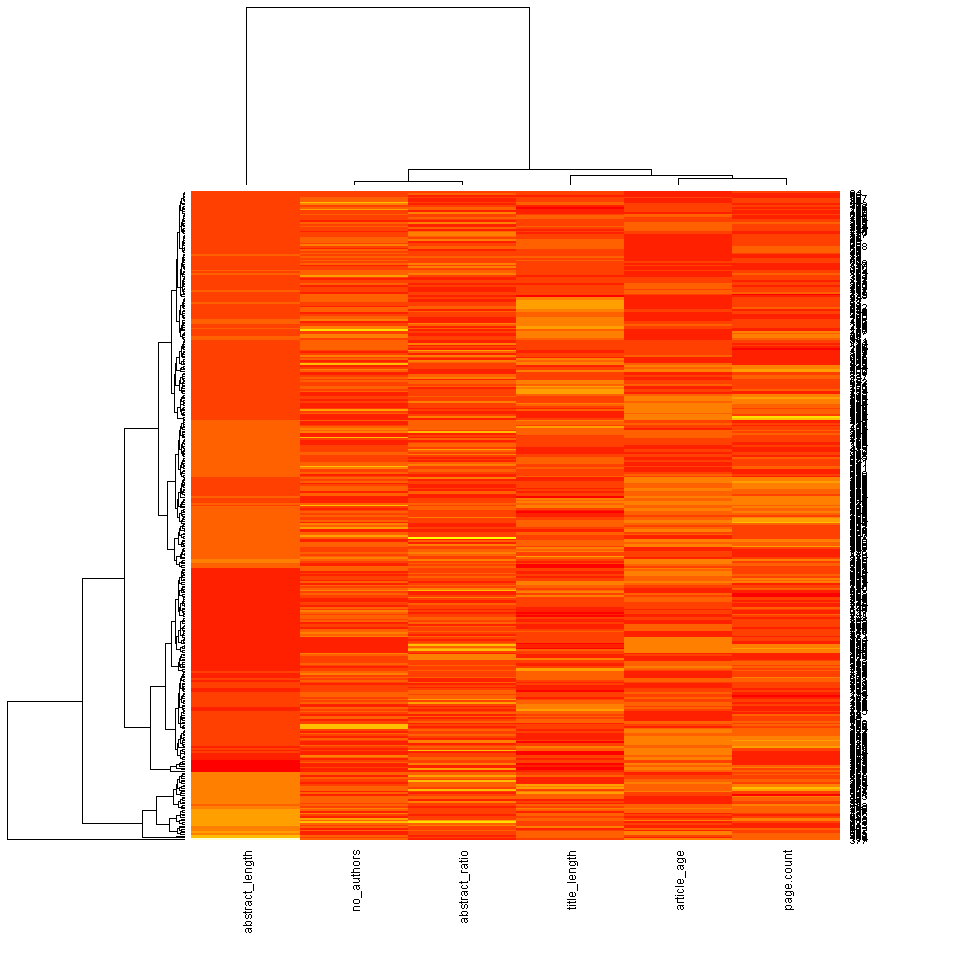

In [34]:
windows.options(width=10000, height=20000)
heatmap(as.matrix(data[,c(predictors)]), Colv=F, scale='column',cexCol = 0.75, margins = c(6,6) )

# Writing Data